<a href="https://colab.research.google.com/github/AhmedKhan2210/Walmart-Business-Case/blob/main/Business_Case_Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing all the libraries and performed usual analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,binom,poisson, expon,geom, boxcox
from statsmodels.stats import weightstats as stests   # for two sample z-test
import statsmodels.api as sm #for z proportion test
from scipy.stats import ttest_1samp # for one sample T test
from scipy.stats import ttest_ind #for two independent sample T test
from scipy.stats import ttest_rel #for two dependent sample T test
df = pd.read_csv('walmart_data.csv')

In [7]:
df.head() #first 5 rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df.shape #will give number of rows and columns

(550068, 10)

In [9]:
df.info() #will give data type of each column and null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365




---



---



In [11]:
#checking null values and dealing with outliers
df.isnull().sum()  #will give sum of null values in each column

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


The 'Purchase' column contains continuous variables, and all others are categorical

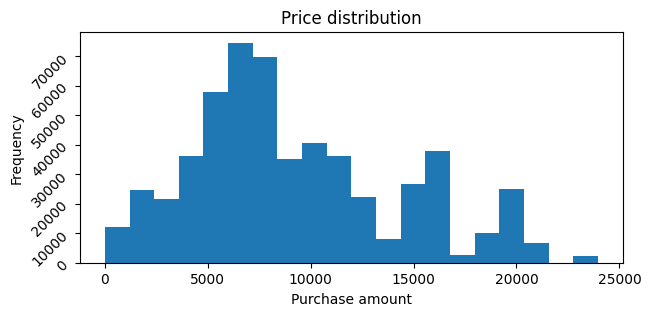

In [12]:
plt.figure(figsize=(7,3))
plt.title("Price distribution")
plt.hist(df["Purchase"], bins=20)
plt.xlabel("Purchase amount")
plt.ylabel("Frequency")
plt.yticks(rotation=45)
plt.show()

We can observe from the histogram that purchase amounts between 5000 and 8000 have a higher frequency compared to other purchase amounts. This suggests that a significant number of purchases fall within this price range

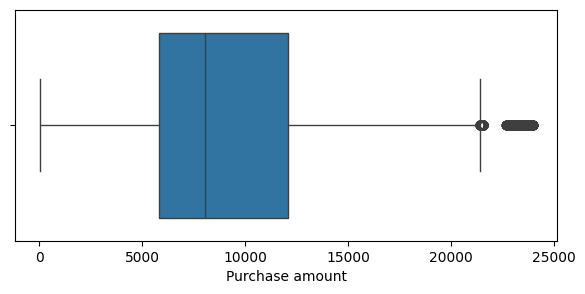

In [13]:
#detecting outliers
plt.figure(figsize=(7,3))
sns.boxplot(data = df, x ="Purchase")
plt.xlabel("Purchase amount")
plt.show()

we can conclude that majorty of purchase amount fall in the range 6000 to 12000

In [14]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [15]:
Q1 = np.percentile(df['Purchase'],25)
Q3= np.percentile(df['Purchase'],75)
IQR = Q3-Q1
outliers = Q3 +(1.5*IQR)
median= df["Purchase"].median()
print(f'upper outlier is:{outliers}')
print(f'median is:{median}')
print(f'IQR = :{IQR}')
print(f'25th quartile=:{Q1}')
print(f'75th quartile:{Q3}')

upper outlier is:21400.5
median is:8047.0
IQR = :6231.0
25th quartile=:5823.0
75th quartile:12054.0


**Analysis:**
Any amount above 21400 is considered as outliers and 50% of the data lies
between 5823 and 12054


Difference b/w median and Q3 is large that means that it is right skewed distribution

Half of the amount are below 8047

25% of purchase amount are below 5823 and 75% of purchase maount are below 12054



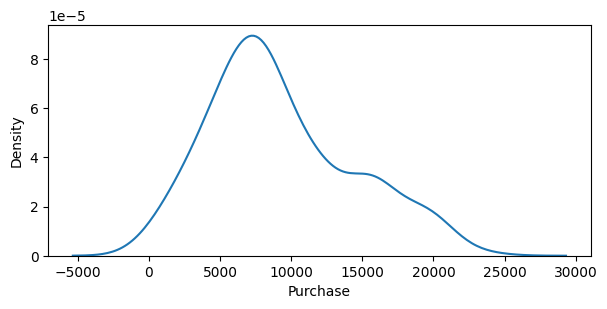

In [16]:
plt.figure(figsize=(7,3))
sns.kdeplot(df["Purchase"],bw_adjust=5)
plt.show()

**Analysis** :
as we have calcuated difference between Q3 and median found that it was large hence visualize and found that distribution is rightskewed

In [17]:
np.mean(df['Purchase']),np.median(df["Purchase"]), stats.mode(df['Purchase'])

(9263.968712959126, 8047.0, ModeResult(mode=7011, count=191))

**For right skewed distribution mean>median>mode, here we have calculated and got result as expected for right skewed distribution**

In [18]:
percentile_5= np.percentile(df["Purchase"],5)
percentile_95=np.percentile(df["Purchase"],95)
clipped_data = np.clip(df["Purchase"],percentile_5,percentile_95)
clipped_data #data below 5th percentile becomes equal to 5th percentile, value above 95th percentile becomes exactly equal to 95th percentile
#it is the way to remove outliers.

0          8370
1         15200
2          1984
3          1984
4          7969
          ...  
550063     1984
550064     1984
550065     1984
550066     1984
550067     1984
Name: Purchase, Length: 550068, dtype: int64



---



---



In [19]:
#Data Exploration
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


**Analysis**

Total we have 3631 unique products for selling, in which Product_ID P00265242 is the most popular product among customers 1880 times sold

Most of the time our customer is male frequency of visiting male customer is 414259

The frequency of the age range 26-35 appearing 219,587 times in the dataset indicates its significant representation

We have a total of 3 unique types of cities, with most customers belonging to city B

Most individuals are newcomers to the city, having stayed for less than one year

In [20]:
df1 = df.copy() #creating a copy of dataframe
df1['Purchase']=clipped_data #assigning clipped data to purchase column
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [21]:
#Relationship between product and age
grouped_data = df.groupby(by = ['Age','Product_ID']).size().reset_index(name='count')
pivot_table = grouped_data.pivot(index=['Product_ID'], columns=['Age'], values = ['count']).fillna(0)
pivot_table

count                                       
Age         0-17  18-25  26-35  36-45 46-50 51-55   55+
Product_ID                                             
P00000142   55.0  259.0  445.0  228.0  83.0  57.0  25.0
P00000242   19.0   88.0  131.0   79.0  26.0  26.0   7.0
P00000342   11.0   48.0   95.0   37.0  15.0  23.0  15.0
P00000442    2.0   18.0   46.0   17.0   4.0   3.0   2.0
P00000542    9.0   33.0   56.0   33.0   8.0   9.0   1.0
...          ...    ...    ...    ...   ...   ...   ...
P0099442     4.0   56.0   97.0   25.0  10.0   3.0   5.0
P0099642     0.0    2.0    6.0    3.0   0.0   1.0   1.0
P0099742    15.0   32.0   41.0   27.0  10.0   1.0   0.0
P0099842     1.0   13.0   23.0   26.0  16.0  14.0   9.0
P0099942     0.0    3.0    3.0    2.0   0.0   4.0   2.0

[3631 rows x 7 columns]

**Analysis**

We can easily identify which products are popular among different age groups, if we ant to identify some certain product we can use .loc method to locate that product to check its popularity amoung different age group

In [22]:
pivot_table.loc['P00265242'] #to check each product's popularity among different age group

       Age  
count  0-17      41.0
       18-25    389.0
       26-35    746.0
       36-45    322.0
       46-50    138.0
       51-55    140.0
       55+      104.0
Name: P00265242, dtype: float64

In [23]:
d =grouped_data.groupby(by=['Age',"Product_ID"])['count'].idxmax().sort_values(ascending =False)
d=d.reset_index(name='count')
max_count = d.groupby(by=["Age"])['count'].idxmax()
max_product_by_each_age = d.loc[max_count]
max_product_by_each_age=max_product_by_each_age.reset_index()
max_product_by_each_age

,index,Age,Product_ID,count
0,18552,0-17,P0099842,2322
1,15332,18-25,P0099942,5542
2,11905,26-35,P0099942,8969
3,8577,36-45,P0099942,12297
4,5471,46-50,P0099842,15403
5,2584,51-55,P0099942,18290
6,0,55+,P0099942,20874


<Axes: xlabel='Age', ylabel='count'>

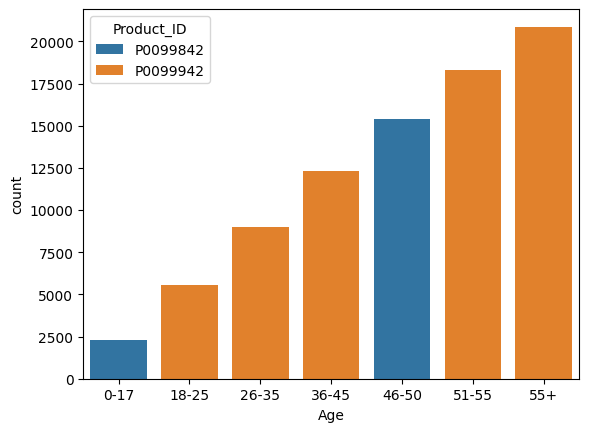

In [24]:
sns.barplot(data =max_product_by_each_age, x='Age', y="count", hue ="Product_ID")

**Analysis**

Two type of product are most popular among diff age group, product type P0099842 is most popular in 0-17 and 46-50 age group.

P0099942 product type demand increasing as the age increasing except age group 0-17 and 46-50

In [25]:
#relationship between age , marital status, amount spent
marital_st={0:"unmarried", 1: 'married'}
df1["Marital_Status"] =df1["Marital_Status"].replace(marital_st)

#now we have three catogorical column we will perform anova test to check correlation

from statsmodels.formula.api import ols
import statsmodels.api as sm

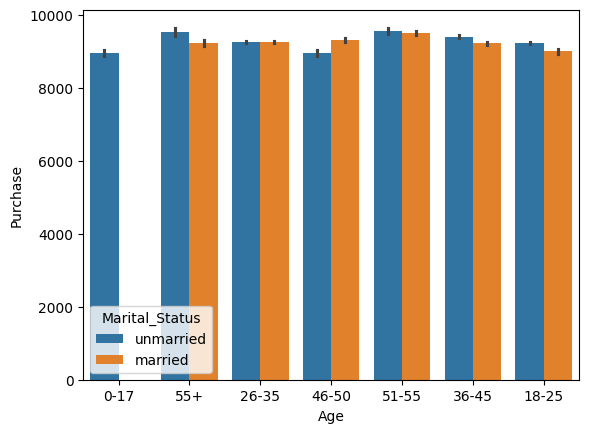

In [26]:
sns.barplot(data= df1, x= "Age", y='Purchase', hue='Marital_Status')
plt.show()

**Analysis**
We can observe small difference in purchasing behaviour of different age group and marital status

In [27]:
#To check relationship will perfrom two way anova (one numerical and more than 3 catogorical column comparison)
import statsmodels.api as sm
from statsmodels.formula.api import ols
'''
NUll Hypothesis for main effect

H0: There is no significant diffrence in purchase between maried and unmarried individuals
H0: there is affect of age on saled among different age groups

Alternate Hypothesis for main effect

Ha: There is significant diffrence in purchase between married and unmarried
Ha: There is impact on spent amount of Age groups

NUll Hypothesis for interaction effect

H0:There is no interaction between Age and marital status
Ha: There is interaction effect between age and marital status on purchase

'''

test = ols('Purchase ~ C(Marital_Status) * C(Age)',data=df1).fit()

In [28]:
anova_table = sm.stats.anova_lm(test, typ=2)
anova_table

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Marital_Status),3.375598e+12,1.0,1.432488e+05,0.000000
C(Age),-8.540713e-02,6.0,-6.040644e-10,1.000000
C(Marital_Status):C(Age),2.439383e+06,6.0,1.725318e-02,0.895497
Residual,1.296181e+13,550055.0,NaN,NaN


In [29]:
p_val_marital_st = 1.347845e-07
#lets compare with 95% confidence interval
Alpha =0.05

# here p_val <Alpha , reject null hypothesis
#There is significant diffrence

p_val_Age = 0
# less than alpha ,#There is significant diffrence

p_val_age_marita_st =1.211968e-61
# here p_val <Alpha , reject null hypothesis
#There is significant diffrence


**Analysis:**

**There is significant diffrence in purchase between married and unmarried**

**There is significant diffrence in purchase among different age group**

**There is interaction between Age and marital status on purchase**

In [30]:
#Are there preferred product categories for different genders?
grpd_data = df1.groupby(by=['Product_Category','Gender']).value_counts().reset_index()


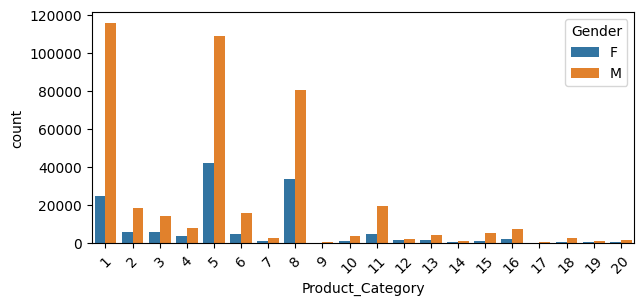

In [31]:
plt.figure(figsize=(7,3))
sns.countplot(data= grpd_data, x= "Product_Category",hue ='Gender')
plt.xticks(rotation=45)
plt.show()

**Analysis**

Product cat 1,5,8 are most popular and preferred by male users respectively

in female users product cat. 5,8,1 are most popular respectively

Most number of buyers are male

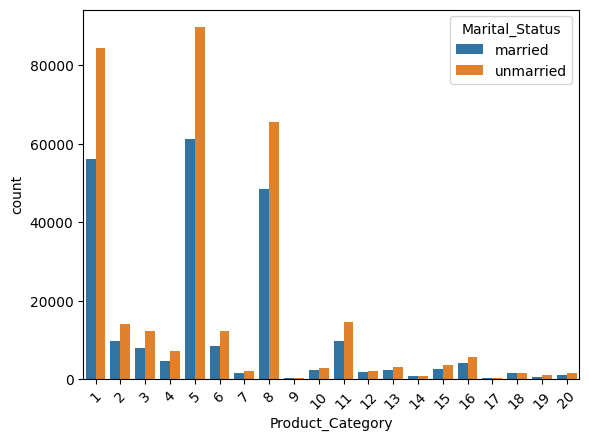

In [78]:
#Are there preferred product categories for married and unmarried?
g_data = df1.groupby(by=["Product_Category","Marital_Status"]).value_counts().reset_index()
sns.countplot(data=g_data, x= "Product_Category",hue ='Marital_Status')
plt.xticks(rotation=45)
plt.show()

Again cat 1,5,8 are most popular in Married and Unmarried people,
cat 2,3,6,11 are the 2nd most popular

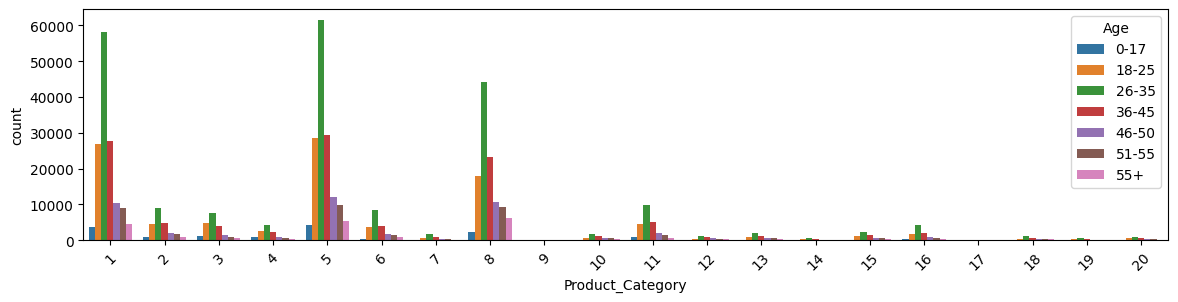

In [82]:
#Are there preferred product categories for different age group?
plt.figure(figsize=(14,3))
g_data = df1.groupby(by=["Product_Category","Age"]).value_counts().reset_index()
sns.countplot(data=g_data, x= "Product_Category",hue ='Age')
plt.xticks(rotation=45)
plt.show()

Again cat 1,5,8 are most popular in different age group
, cat 2,3,6,11 are the 2nd most popular

In [33]:
# Statistical Test
# hence there are two categorical column we will perform chi square test
'''
H0: There is no significance difference between prod.cat and gender
Ha: There is substentail difference between prod.cat and gender
'''
from scipy.stats import chi2_contingency
cont_table = pd.crosstab(df1['Product_Category'], df["Gender"])
cont_table
chi_stat, p_val, df, exp_freq = chi2_contingency(cont_table)
chi_stat, p_val, df, exp_freq

(8070.411022236562,
 0.0,
 19,
 array([[3.46586164e+04, 1.05719384e+05],
        [5.89190059e+03, 1.79720994e+04],
        [4.99048721e+03, 1.52225128e+04],
        [2.90175610e+03, 8.85124390e+03],
        [3.72645924e+04, 1.13668408e+05],
        [5.05295162e+03, 1.54130484e+04],
        [9.18696032e+02, 2.80230397e+03],
        [2.81275048e+04, 8.57974952e+04],
        [1.01226921e+02, 3.08773079e+02],
        [1.26533651e+03, 3.85966349e+03],
        [5.99633715e+03, 1.82906629e+04],
        [9.74494286e+02, 2.97250571e+03],
        [1.37001996e+03, 4.17898004e+03],
        [3.76020977e+02, 1.14697902e+03],
        [1.55296911e+03, 4.73703089e+03],
        [2.42648337e+03, 7.40151663e+03],
        [1.42705269e+02, 4.35294731e+02],
        [7.71546654e+02, 2.35345335e+03],
        [3.95772572e+02, 1.20722743e+03],
        [6.29582070e+02, 1.92041793e+03]]))

**Analysis**

As p value is less than 0.05 we reject null hypothesis

The chi-square statistic is 3159.26, which is large, indicating a significant difference.


The p-value is reported as 0.0. This doesn't mean it's precisely zero, but rather it's so small that it's effectively zero. This indicates strong evidence against the null hypothesis.

There is substentail difference between prod.cat and gender

**As we have observed above**

Product cat 1,5,8 are most popular and preferred by male users respectively

in female users product cat. 5,8,1 are most popular respectively

Most number of buyers are male




---



---



In [34]:
#Gender affects on amount spent
#calculating mean,std of purchase of each gender

male_mean = np.mean(df1[df1['Gender']=="M"]["Purchase"])
female_mean = np.mean(df1[df1['Gender']=="F"]["Purchase"])
std_male = df1[df1['Gender']=="M"]["Purchase"].std()
std_female = df1[df1['Gender']=="F"]["Purchase"].std()
male_mean,female_mean,std_male,std_female


(9427.240996574606, 8736.540266109021, 4925.953492284638, 4596.98461352269)

In [35]:
#computing 95% confidence interval for the given data first
z_score = norm.ppf(0.025)
z_score

-1.9599639845400545

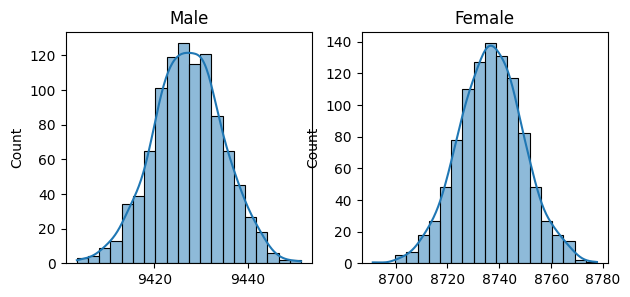

In [36]:
male_df =df1[df1['Gender']=="M"]
female_df= df1[df1["Gender"]=="F"]
sample_1_male=[]
for i in range (1000):
  bootstrapped_samp = np.mean(np.random.choice(male_df["Purchase"],size = len(male_df)))
  sample_1_male.append(bootstrapped_samp)

sample_1_female=[]
for i in range (1000):
  booststrapped_samp= np.mean(np.random.choice(female_df["Purchase"],size = len(female_df)))
  sample_1_female.append(booststrapped_samp)
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.histplot(sample_1_male,kde=True,bins=20)
plt.title("Male")
plt.subplot(1,2,2)
sns.histplot(sample_1_female,kde=True, bins =20)
plt.title("Female")
plt.show()

In [37]:
#margins_of_error
me_male = z_score*(np.std(sample_1_male))
me_female = z_score*(np.std(sample_1_female))
confidence_interval_female =(female_mean + me_female, female_mean - me_female)
confidence_interval_male = (male_mean+me_male,male_mean-me_male )
confidence_interval_male, confidence_interval_female

((9412.482502224033, 9441.99949092518), (8712.14805972696, 8760.932472491082))

**Analysis**

The average amount spent by males falls within the range of (9412.63, 9441.85), while for females, it falls within (8712.00, 8761.08).


Based on these confidence intervals, it appears that males tend to spend more on average compared to females.



There is no overlap between the confidence intervals for males and females. This suggests that the difference in average spending between genders may be statistically significant.


In summary, based on the provided confidence intervals, it appears that there is a difference in average amount spent between males and females, with males tending to spend more on average. However, further analysis and consideration of additional factors are necessary for a comprehensive understanding of this difference.

<function matplotlib.pyplot.show(close=None, block=None)>

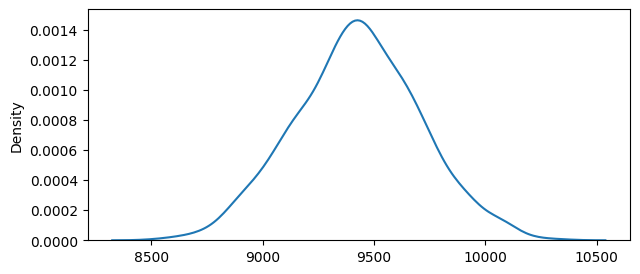

In [38]:
#Bootstrapping for sample 300,3000, 30000
sample_300_male=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(male_df["Purchase"],size=300))
  sample_300_male.append(bootstrapped_sample1)
plt.figure(figsize=(7,3))
sns.kdeplot(sample_300_male)
plt.show

In [39]:
sample_300_male_mean = np.mean(sample_300_male)
sample_300_male_std = np.std(sample_300_male)
std_error_300_male = sample_300_male_std/np.sqrt(300)
std_error_300_male

16.290892968321902

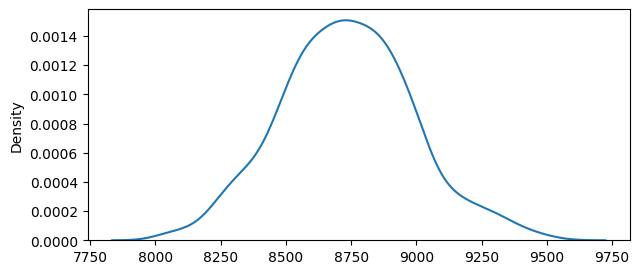

In [40]:
sample_300_female=[]
for i in range (1000):
  bootstrapped_sample2= np.mean(np.random.choice(female_df["Purchase"],size =300))
  sample_300_female.append(bootstrapped_sample2)
plt.figure(figsize = (7,3))
sns.kdeplot(sample_300_female)
plt.show()


In [41]:
sample_300_female_mean= np.mean(sample_300_female)
sample_300_female_std= np.std(sample_300_female)
std_error_300_female = sample_300_female_std/np.sqrt(300)
std_error_300_female

14.798314037569584

In [42]:

sample_3000_male=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(male_df["Purchase"],size=3000))
  sample_3000_male.append(bootstrapped_sample1)


In [43]:
sample_3000_male_mean = np.mean(sample_3000_male)
sample_3000_male_std=np.std(sample_3000_male)
std_error_3000_male = sample_3000_male_std/np.sqrt(3000)
std_error_3000_male

1.668429921596123

In [44]:
sample_3000_female=[]
for i in range (1000):
  bootstrapped_sample2= np.mean(np.random.choice(female_df["Purchase"],size =3000))
  sample_3000_female.append(bootstrapped_sample2)


In [45]:
sample_3000_female_mean=np.mean(sample_3000_female)
sample_3000_female_std= np.std(sample_3000_female)
std_error_3000_female = sample_3000_female_std/np.sqrt(3000)
std_error_3000_female

1.6064801452887556

In [46]:
sample_30000_male=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(male_df["Purchase"],size=30000))
  sample_30000_male.append(bootstrapped_sample1)


In [47]:
sample_30000_male_mean= np.mean(sample_30000_male)
sample_30000_male_std= np.std(sample_30000_male)
std_error_30000_male = sample_30000_male_std/np.sqrt(30000)
std_error_30000_male

0.16443324874045634

In [48]:
sample_30000_female=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(female_df["Purchase"],size=30000))
  sample_30000_female.append(bootstrapped_sample1)

In [49]:
sample_30000_female_mean= np.mean(sample_30000_female)
sample_30000_female_std= np.std(sample_30000_female)
std_error_30000_female = sample_30000_female_std/np.sqrt(30000)
std_error_30000_female

0.15375255485525174

In [50]:
sample_30000_female_mean-(z_score*std_error_30000_female)

8737.948911503381

In [51]:
sample_30000_female_mean+(z_score*std_error_30000_female)

8737.346212563285

In [52]:
#confidence interval for female with 30000 sample
x1 =np.percentile(sample_30000_female,2.5)
x2 = np.percentile(sample_30000_female,97.5)
x1,x2

(8685.726156666666, 8791.170506666665)

In [53]:
#confidence interval for male with 30000 sample
y1 = np.percentile(sample_30000_male,2.5)
y2 = np.percentile (sample_30000_male,97.5)
y1,y2

(9376.796303333334, 9487.9790975)

In [54]:
#confidence interval for female with 3000 sample
x1 =np.percentile(sample_3000_female,2.5)
x2 = np.percentile(sample_3000_female,97.5)
x1,x2

(8570.358208333333, 8908.097433333334)

In [55]:
#confidence interval for male with 3000 sample
y1 = np.percentile(sample_3000_male,2.5)
y2 = np.percentile (sample_3000_male,97.5)
y1,y2

(9249.898500000001, 9605.9245)

In [56]:
#confidence interval for female with 300 sample
x1 =np.percentile(sample_300_female,2.5)
x2 = np.percentile(sample_300_female,97.5)
x1,x2

(8247.195083333334, 9283.382)

In [57]:
#confidence interval for male with 300 sample
y1 = np.percentile(sample_300_male,2.5)
y2 = np.percentile (sample_300_male,97.5)
y1,y2

(8876.591083333333, 9981.572666666667)

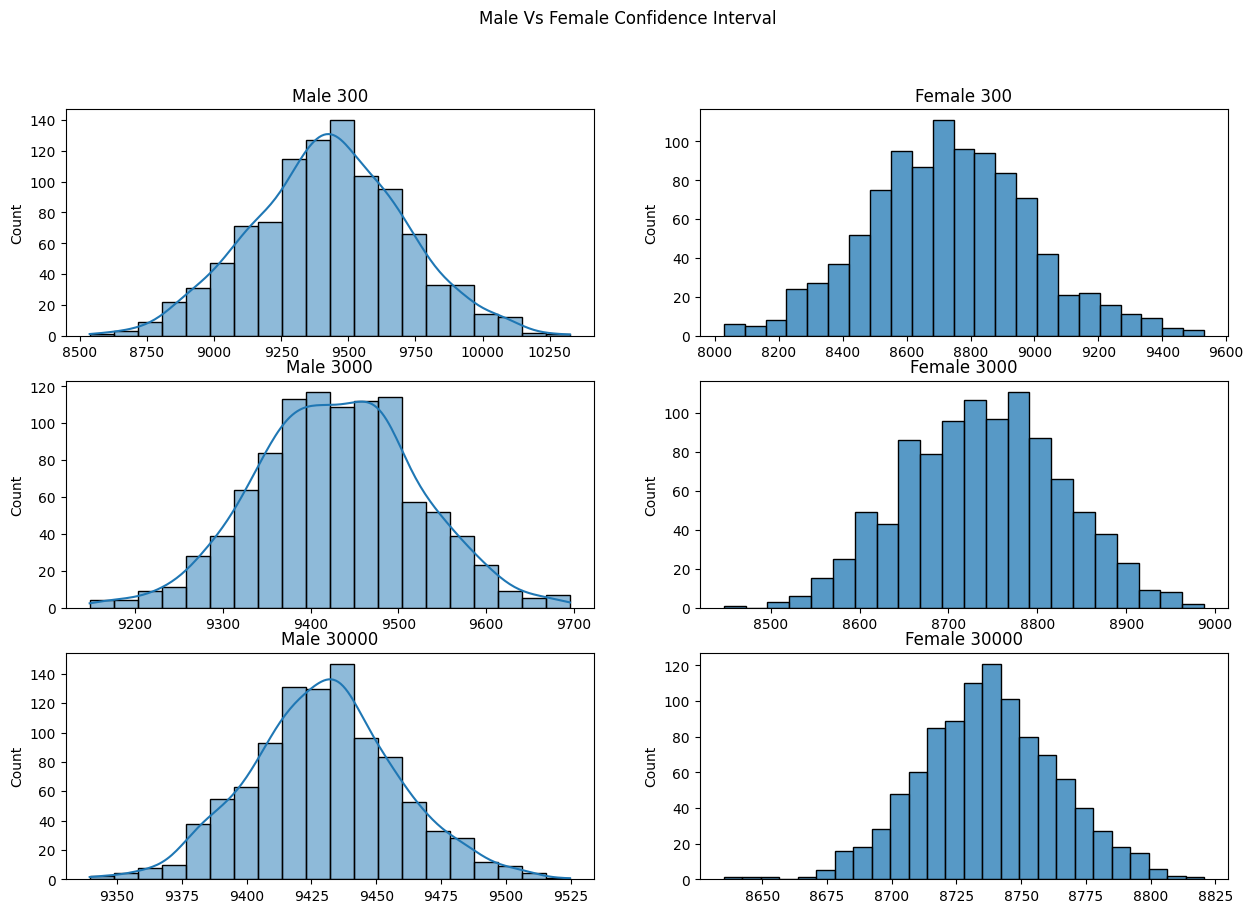

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.title("Male 300")
plt.suptitle("Male Vs Female Confidence Interval")
sns.histplot(sample_300_male,kde=True,bins=20)


plt.subplot(3,2,3)
plt.title("Male 3000")
sns.histplot(sample_3000_male,kde=True,bins=20)

plt.subplot(3,2,5)
plt.title("Male 30000")
sns.histplot(sample_30000_male,kde=True,bins=20)

plt.subplot(3,2,2)
plt.title("Female 300")
sns.histplot(sample_300_female)

plt.subplot(3,2,4)
plt.title("Female 3000")
sns.histplot(sample_3000_female)

plt.subplot(3,2,6)
plt.title("Female 30000")
sns.histplot(sample_30000_female)
plt.show()

**Analysis**

1. The confidence interval is wider for males compared to females across all sample sizes (300, 3000, 30000). This can be observed by comparing the range of the confidence intervals for males and females at each sample size.
The wider confidence interval for males suggests higher variability or dispersion in the underlying male data compared to the female data.

2. The width of the confidence interval decreases as the sample size increases, for both males and females. This can be seen by comparing the ranges of the confidence intervals across different sample sizes.
This narrowing of the confidence interval with increasing sample size is expected due to the Central Limit Theorem and the reduced standard error of the mean for larger sample sizes.
3. The confidence intervals for different sample sizes do overlap for both males and females. For example, the confidence intervals for females at sample sizes 300, 3000, and 30000 all overlap to some extent, indicating that the estimated means or confidence intervals have overlapping ranges.

4. We can infer that as the sample size increases, the distributions of means  becoming more concentrated and closer to a normal distribution.
The narrowing of the confidence intervals with increasing sample size suggests that the distributions are becoming more concentrated around the mean, which is a characteristic of the normal distribution for larger sample sizes.



---



---



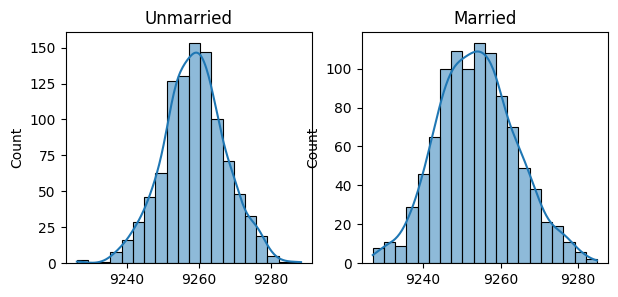

In [59]:
#Effect of marital status on purchase
df_unmarried = df1[df1["Marital_Status"]=="unmarried"]
df_married = df1[df1["Marital_Status"]=="married"]
unmarried_mean = np.mean(df_unmarried["Purchase"])
married_mean = np.mean(df_married["Purchase"])

# Boot strpping given data
boot_sample_unmarried =[]
for i in range (1000):
  samp = np.mean(np.random.choice(df_unmarried["Purchase"],size =len(df_unmarried)))
  boot_sample_unmarried.append(samp)

boot_sample_married =[]
for i in range (1000):
  samp = np.mean(np.random.choice(df_married["Purchase"], size = len(df_married)))
  boot_sample_married.append(samp)
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.title("Unmarried")
sns.histplot(boot_sample_unmarried, kde=True, bins =20)
plt.subplot(1,2,2)
plt.title("Married")
sns.histplot(boot_sample_married, kde= True, bins =20)
plt.show()


In [60]:
z_score = norm.ppf(0.025)
z_score

-1.9599639845400545

In [61]:
margine_error_unmarried = z_score*(np.std(boot_sample_unmarried))
margine_error_married = z_score*(np.std(boot_sample_married))
confidence_interval_unmarried = (unmarried_mean -margine_error_unmarried,unmarried_mean + margine_error_unmarried )
confidence_interval_married = (married_mean -margine_error_married,married_mean + margine_error_married )
confidence_interval_unmarried,confidence_interval_married

((9275.774188944517, 9241.866738469249),
 (9273.532638352322, 9233.807008487745))

**Analysis**
The average amount spent by unmarried individuals falls within the range of (9242.46, 9275.18), while for married individuals, it falls within (9233.94, 9273.40).
There isn't a significant difference in the average spending between unmarried and married individuals based solely on these confidence intervals.


Since the confidence intervals overlap, we cannot conclude with statistical significance that there is a difference in average spending between unmarried and married individuals.


While the confidence intervals provide insight into the potential range of average spending, other factors such as sample size, distribution of spending data, and potential confounding variables should also be considered in drawing conclusions about differences in spending behavior between unmarried and married individuals.


In summary, based on the provided confidence intervals, there isn't sufficient evidence to conclude that there is a significant difference in the average amount spent between unmarried and married individuals.

In [62]:
#now bootstarpping with sample size 300, 3000, 30000
sample_300_unmarried=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_unmarried["Purchase"],size=300))
  sample_300_unmarried.append(bootstrapped_sample1)

sample_300_married =[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_married["Purchase"],size=300))
  sample_300_married.append(bootstrapped_sample1)

#3000 sample

sample_3000_unmarried=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_unmarried["Purchase"],size=3000))
  sample_3000_unmarried.append(bootstrapped_sample1)

sample_3000_married =[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_married["Purchase"],size=3000))
  sample_3000_married.append(bootstrapped_sample1)

#30000 sample
sample_30000_unmarried=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_unmarried["Purchase"],size=30000))
  sample_30000_unmarried.append(bootstrapped_sample1)

sample_30000_married =[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_married["Purchase"],size=30000))
  sample_30000_married.append(bootstrapped_sample1)

In [63]:
#confidence interval of all the sample
#300
x1_300_unmarried=np.percentile(sample_300_unmarried,2.5)
x2_300_unmarried=np.percentile(sample_300_unmarried,97.5)

y1_300_married = np.percentile(sample_300_married,2.5)
y2_300_married = np.percentile(sample_300_married,97.5)
#3000
x1_3000_unmarried=np.percentile(sample_3000_unmarried,2.5)
x2_3000_unmarried=np.percentile(sample_3000_unmarried,97.5)

y1_3000_married = np.percentile(sample_3000_married,2.5)
y2_3000_married = np.percentile(sample_3000_married,97.5)
#30000

x1_30000_unmarried=np.percentile(sample_30000_unmarried,2.5)
x2_30000_unmarried=np.percentile(sample_30000_unmarried,97.5)

y1_30000_married = np.percentile(sample_30000_married,2.5)
y2_30000_married = np.percentile(sample_30000_married,97.5)

np.mean(sample_300_unmarried), np.mean(sample_300_married),np.mean(sample_3000_unmarried), np.mean(sample_3000_married),np.mean(sample_30000_unmarried), np.mean(sample_30000_married)

(9267.338136666667,
 9243.42924,
 9260.049722333333,
 9259.186526999998,
 9259.097692233334,
 9253.434680666667)

In [64]:
print("CI for 300 unmarried sample",(x1_300_unmarried,x2_300_unmarried) )
print("CI for 300 married sample",(y1_300_married,y2_300_married))
print()
print("CI for 3000 unmarried sample",(x1_3000_unmarried,x2_3000_unmarried) )
print("CI for 3000 married sample",(y1_3000_married,y2_3000_married) )
print()
print("CI for 30000 unmarried sample",(x1_30000_unmarried,x2_30000_unmarried) )
print("CI for 30000 married sample",(y1_30000_married,y2_30000_married) )

CI for 300 unmarried sample (8681.09375, 9805.538833333334)
CI for 300 married sample (8720.464916666666, 9800.010166666665)

CI for 3000 unmarried sample (9082.439125, 9428.6171)
CI for 3000 married sample (9088.406166666666, 9433.003416666666)

CI for 30000 unmarried sample (9206.097405833332, 9314.165920833333)
CI for 30000 married sample (9196.526055, 9307.507921666667)


**Analysis**


Comparison between Unmarried and Married Individuals:
For all sample sizes (300, 3000, and 30000), the confidence intervals for both unmarried and married individuals do not overlap.


This suggests that there may be a significant difference in the average amount spent between unmarried and married individuals.


Effect of Sample Size:
As the sample size increases from 300 to 30000:
The width of the confidence intervals decreases.
The precision of the estimates improves, resulting in narrower confidence intervals.


This indicates that larger sample sizes provide more reliable estimates of the population mean.


Consistency in Mean Spending:
The point estimates (mean spending) for both unmarried and married individuals are consistent across different sample sizes.


This consistency suggests that the mean spending behavior of unmarried and married individuals remains relatively stable regardless of the sample size.
Interpretation:
Based on these confidence intervals, we can conclude that there is a difference in average amount spent between unmarried and married individuals.


In summary, the provided confidence intervals suggest that there is a consistent difference in average spending between unmarried and married individuals across different sample sizes, with married individuals generally spending more than unmarried individuals.


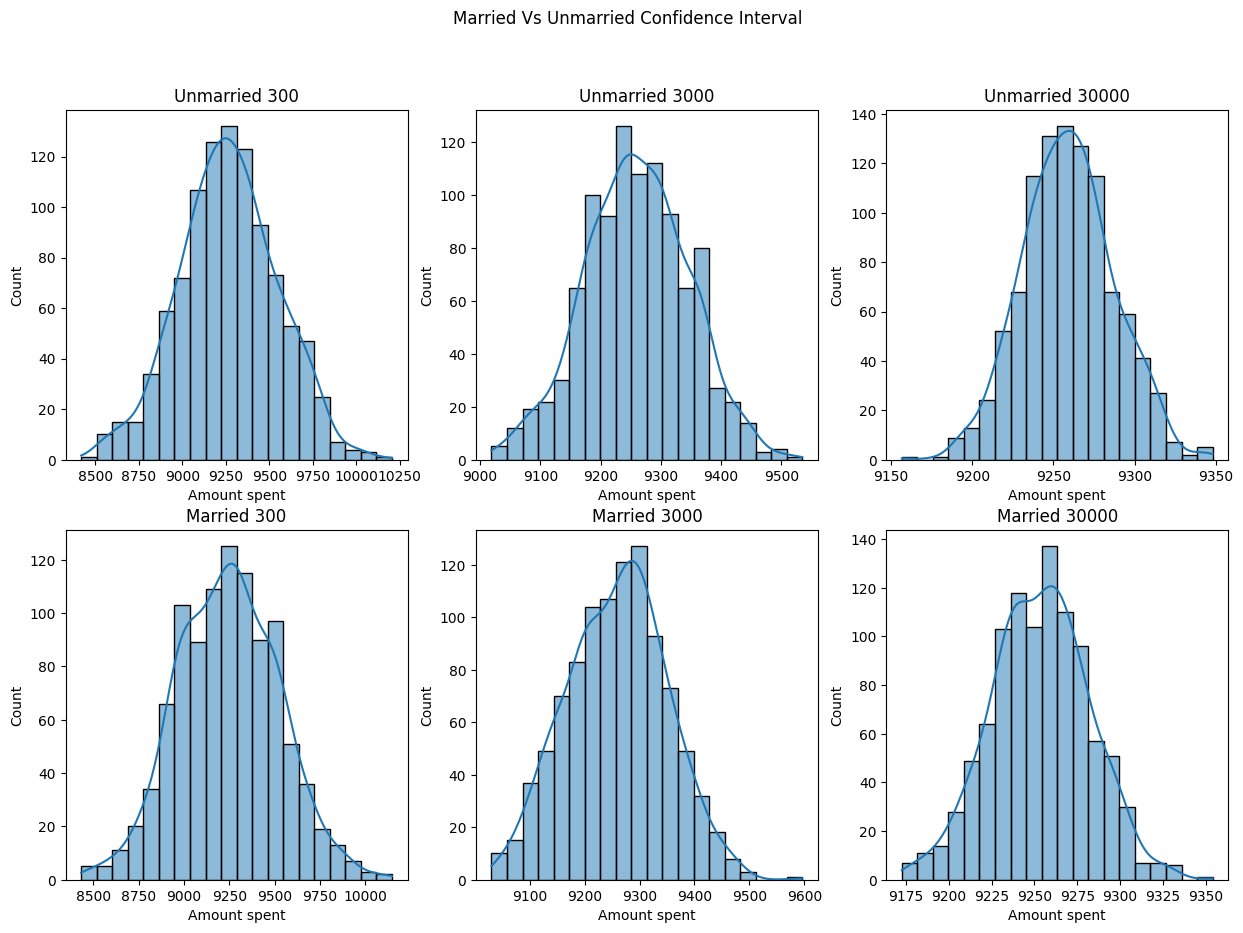

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.title("Unmarried 300")
plt.suptitle("Married Vs Unmarried Confidence Interval")
sns.histplot(sample_300_unmarried,kde=True,bins=20)
plt.xlabel("Amount spent")
plt.ylabel("Count")

plt.subplot(2,3,4)
plt.title("Married 300")
sns.histplot(sample_300_married,kde=True,bins=20)
plt.xlabel("Amount spent")
plt.ylabel("Count")

plt.subplot(2,3,2)
plt.title("Unmarried 3000")
sns.histplot(sample_3000_unmarried,kde=True,bins=20)
plt.xlabel("Amount spent")
plt.ylabel("Count")

plt.subplot(2,3,5)
plt.title("Married 3000")
sns.histplot(sample_3000_married,kde=True,bins=20)
plt.xlabel("Amount spent")
plt.ylabel("Count")

plt.subplot(2,3,3)
plt.title("Unmarried 30000")
sns.histplot(sample_30000_unmarried,kde=True,bins=20)
plt.xlabel("Amount spent")
plt.ylabel("Count")

plt.subplot(2,3,6)
plt.title("Married 30000")
sns.histplot(sample_30000_married,kde=True,bins=20)
plt.xlabel("Amount spent")
plt.ylabel("Count")
plt.show()



---



---



In [66]:
#Affect of Age on Purchase
df1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [67]:
#Effect of marital status on purchase
df_0_17 = df1[df1["Age"]=="0-17"]
df_55_plus = df1[df1["Age"]=="55+"]
df_26_35 = df1[df1["Age"]=="26-35"]
df_46_50 = df1[df1["Age"]=="46-50"]
df_51_55 = df1[df1["Age"]=="51-55"]
df_36_45 = df1[df1["Age"]=="36-45"]
df_18_25 = df1[df1["Age"]=="18-25"]

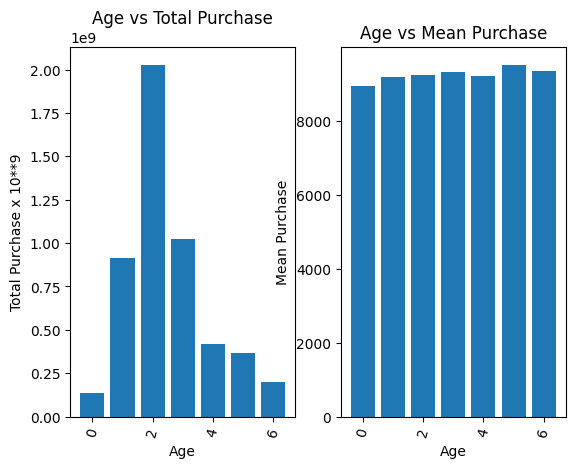

In [68]:
pivot_df = df1[['Age','Purchase']]
pivot_df = pivot_df.pivot(columns="Age", values = 'Purchase')
pivot_df= pivot_df.T
grpd_sum = pivot_df.sum(axis=1)
grpd_mean = pivot_df.mean(axis=1)
grpd_mean = grpd_mean.reset_index(name="mean")
grpd_sum = grpd_sum.reset_index(name="sum")

plt.subplot(1,2,1)

plt.bar(x = grpd_sum["Age"].index, height = grpd_sum['sum'])
plt.title("Age vs Total Purchase")
plt.xlabel("Age")
plt.xticks(rotation = 75)
plt.ylabel("Total Purchase x 10**9")
plt.subplot(1,2,2)

plt.bar(x = grpd_mean["Age"].index, height = grpd_mean['mean'])
plt.title("Age vs Mean Purchase")
plt.xlabel("Age")
plt.xticks(rotation = 75)
plt.ylabel("Mean Purchase")
plt.show()


**Analysis**

As we can observe from grpah age between 26-35  spent amount is higher

Age group 18-25, 36-45, 26-35 have contibuted 78% of total purchase

Age group 0-17 spent amount is less among all

while looking over mean avg spent amount is amost same for each group with slight difference, this means we have large population from age group 0-17 , 55+,51-55,and 46-50

In [69]:
desc_df = df1.groupby(by=['Age'])["Purchase"].aggregate([np.mean, np.median,np.sum,np.std])
desc_df

,mean,median,sum,std
Age,,,,
0-17,8940.649053,7986.0,135021682,4940.597254
18-25,9169.010977,8027.0,913783634,4889.430684
26-35,9243.780119,8030.0,2029813945,4855.192053
36-45,9322.921909,8061.0,1025642608,4847.597842
46-50,9204.211483,8036.0,420641669,4785.942157
51-55,9514.863250,8130.0,366331750,4873.629668
55+,9327.796549,8105.5,200584937,4779.935889


In [70]:
#Bootstrapping on given data
sample_0_17=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_0_17["Purchase"],size=len(df_0_17)))
  sample_0_17.append(bootstrapped_sample1)

sample_18_25=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_18_25["Purchase"],size=len(df_18_25)))
  sample_18_25.append(bootstrapped_sample1)

sample_26_35=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_26_35["Purchase"],size=len(df_26_35)))
  sample_26_35.append(bootstrapped_sample1)

sample_36_45=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_36_45["Purchase"],size=len(df_36_45)))
  sample_36_45.append(bootstrapped_sample1)

sample_46_50=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_46_50["Purchase"],size=len(df_46_50)))
  sample_46_50.append(bootstrapped_sample1)

sample_51_55=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_51_55["Purchase"],size=len(df_51_55)))
  sample_51_55.append(bootstrapped_sample1)

sample_55_plus=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_55_plus["Purchase"],size=len(df_55_plus)))
  sample_55_plus.append(bootstrapped_sample1)


In [71]:
samp = np.array([sample_0_17,sample_18_25,sample_26_35,sample_36_45,sample_46_50,sample_51_55,sample_55_plus])
std_array = np.zeros(len(samp))
for i in range (len(samp)):
  std_array[i] = np.std(samp[i])
print(std_array)

[38.3780545  15.87405575  9.88182065 14.80181126 21.43006555 24.86585832
 32.00603446]


In [72]:
z_score = norm.ppf(0.025)
z_score

-1.9599639845400545

In [73]:
mean_list = desc_df["mean"].tolist()
mean_list

[8940.64905310555,
 9169.010977322898,
 9243.780119041656,
 9322.92190922891,
 9204.211483337345,
 9514.863250305187,
 9327.796549479166]

In [74]:
# CI
CI1 = (8940.64905310555+(z_score*39.94658479 ), 8940.64905310555-(z_score*39.94658479))
CI2 = (9169.010977322898+(z_score*14.72255254 ), 9169.010977322898-(z_score*14.72255254))
CI3 = (9243.780119041656+(z_score*10.07444704 ), 9243.780119041656-(z_score*10.07444704 ))
CI4  = (9322.92190922891+(z_score*14.20896594  ), 9322.92190922891-(z_score*14.20896594  ))
CI5 = (9204.211483337345+(z_score*22.00080654 ), 9204.211483337345-(z_score*22.00080654))
CI6= (9514.863250305187+(z_score*24.58141458 ), 9514.863250305187-(z_score*24.58141458))
CI7 = (9327.796549479166+(z_score*30.30471127 ), 9327.796549479166-(z_score*30.30471127))
CI1,CI2,CI3,CI4,CI5,CI6,CI7

((8862.355185611774, 9018.942920599326),
 (9140.155304584, 9197.866650061796),
 (9224.0345656791, 9263.525672404212),
 (9295.072847728954, 9350.770970728865),
 (9161.090694888111, 9247.33227178658),
 (9466.684563039338, 9563.041937571035),
 (9268.400406828081, 9387.192692130251))

**Analysis**

There is a potential difference in mean purchase amounts among the age groups 0-17, 18-25, 26-35, 35-45 as their confidence intervals do not overlap.

In [75]:
#now bootstarpping with sample size 300, 3000, 30000

#300

sample_0_17_300=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_0_17["Purchase"],size=300))
  sample_0_17_300.append(bootstrapped_sample1)

sample_18_25_300=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_18_25["Purchase"],size=300))
  sample_18_25_300.append(bootstrapped_sample1)

sample_26_35_300=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_26_35["Purchase"],size=300))
  sample_26_35_300.append(bootstrapped_sample1)

sample_36_45_300=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_36_45["Purchase"],size=300))
  sample_36_45_300.append(bootstrapped_sample1)


sample_46_50_300=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_46_50["Purchase"],size=300))
  sample_46_50_300.append(bootstrapped_sample1)


sample_51_55_300=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_51_55["Purchase"],size=300))
  sample_51_55_300.append(bootstrapped_sample1)


sample_55_plus_300=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_55_plus["Purchase"],size=300))
  sample_55_plus_300.append(bootstrapped_sample1)

#3000

sample_0_17_3000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_0_17['Purchase'],size = 3000))
  sample_0_17_3000.append(bootstrapped_sample1)

sample_18_25_3000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_18_25['Purchase'],size = 3000))
  sample_18_25_3000.append(bootstrapped_sample1)

sample_26_35_3000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_26_35['Purchase'],size = 3000))
  sample_26_35_3000.append(bootstrapped_sample1)

sample_36_45_3000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_36_45['Purchase'],size = 3000))
  sample_36_45_3000.append(bootstrapped_sample1)

sample_46_50_3000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_46_50['Purchase'],size = 3000))
  sample_46_50_3000.append(bootstrapped_sample1)

sample_51_55_3000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_51_55['Purchase'],size = 3000))
  sample_51_55_3000.append(bootstrapped_sample1)

sample_55_plus_3000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_55_plus['Purchase'],size = 3000))
  sample_55_plus_3000.append(bootstrapped_sample1)

#30000

sample_0_17_30000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_0_17['Purchase'],size = 30000))
  sample_0_17_30000.append(bootstrapped_sample1)

sample_18_25_30000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_18_25['Purchase'],size = 30000))
  sample_18_25_30000.append(bootstrapped_sample1)

sample_26_35_30000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_26_35['Purchase'],size = 30000))
  sample_26_35_30000.append(bootstrapped_sample1)

sample_36_45_30000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_36_45['Purchase'],size = 30000))
  sample_36_45_30000.append(bootstrapped_sample1)

sample_46_50_30000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_46_50['Purchase'],size = 30000))
  sample_46_50_30000.append(bootstrapped_sample1)

sample_51_55_30000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_51_55['Purchase'],size = 30000))
  sample_51_55_30000.append(bootstrapped_sample1)

sample_55_plus_30000=[]
for i in range (1000):
  bootstrapped_sample1 = np.mean(np.random.choice(df_55_plus['Purchase'],size = 30000))
  sample_55_plus_30000.append(bootstrapped_sample1)

In [76]:
#confidence interval of all the sample
#300
x1_300_0_17=np.percentile(sample_0_17_300,2.5)
x2_300_0_17=np.percentile(sample_0_17_300,97.5)

x3_300_18_25=np.percentile(sample_18_25_300,2.5)
x4_300_18_25=np.percentile(sample_18_25_300,97.5)

x5_300_26_35=np.percentile(sample_26_35_300,2.5)
x6_300_26_35=np.percentile(sample_26_35_300,97.5)

x7_300_36_45=np.percentile(sample_36_45_300,2.5)
x8_300_36_45=np.percentile(sample_36_45_300,97.5)

x9_300_46_50=np.percentile(sample_46_50_300,2.5)
x10_300_46_50=np.percentile(sample_46_50_300,97.5)

x11_300_51_55=np.percentile(sample_51_55_300,2.5)
x12_300_51_55=np.percentile(sample_51_55_300,97.5)

x13_300_55_plus=np.percentile(sample_55_plus_300,2.5)
x14_300_55_plus=np.percentile(sample_55_plus_300,97.5)

#3000

x1_3000_0_17=np.percentile(sample_0_17_3000,2.5)
x2_3000_0_17=np.percentile(sample_0_17_3000,97.5)

x3_3000_18_25=np.percentile(sample_18_25_3000,2.5)
x4_3000_18_25=np.percentile(sample_18_25_3000,97.5)

x5_3000_26_35=np.percentile(sample_26_35_3000,2.5)
x6_3000_26_35=np.percentile(sample_26_35_3000,97.5)

x7_3000_36_45=np.percentile(sample_36_45_3000,2.5)
x8_3000_36_45=np.percentile(sample_36_45_3000,97.5)

x9_3000_46_50=np.percentile(sample_46_50_3000,2.5)
x10_3000_46_50=np.percentile(sample_46_50_3000,97.5)

x11_3000_51_55=np.percentile(sample_51_55_3000,2.5)
x12_3000_51_55=np.percentile(sample_51_55_3000,97.5)

x13_3000_55_plus=np.percentile(sample_55_plus_3000,2.5)
x14_3000_55_plus=np.percentile(sample_55_plus_3000,97.5)

#30000

x1_30000_0_17=np.percentile(sample_0_17_30000,2.5)
x2_30000_0_17=np.percentile(sample_0_17_30000,97.5)

x3_30000_18_25=np.percentile(sample_18_25_30000,2.5)
x4_30000_18_25=np.percentile(sample_18_25_30000,97.5)

x5_30000_26_35=np.percentile(sample_26_35_30000,2.5)
x6_30000_26_35=np.percentile(sample_26_35_30000,97.5)

x7_30000_36_45=np.percentile(sample_36_45_30000,2.5)
x8_30000_36_45=np.percentile(sample_36_45_30000,97.5)

x9_30000_46_50=np.percentile(sample_46_50_30000,2.5)
x10_30000_46_50=np.percentile(sample_46_50_30000,97.5)

x11_30000_51_55=np.percentile(sample_51_55_30000,2.5)
x12_30000_51_55=np.percentile(sample_51_55_30000,97.5)

x13_30000_55_plus=np.percentile(sample_55_plus_30000,2.5)
x14_30000_55_plus=np.percentile(sample_55_plus_30000,97.5)

In [77]:
#0-17
print("CI for 300 sample age group 0-17 ",(x1_300_0_17, x2_300_0_17) )
print("CI for 3000 sample age group 0-17 ",(x1_3000_0_17, x2_3000_0_17))
print("CI for 30000 sample age group 0-17 ",(x1_30000_0_17, x2_30000_0_17))
print()

#18-25
print("CI for 300 sample age group 18-25 ",(x3_300_18_25, x4_300_18_25) )
print("CI for 3000 sample age group 18-25 ",(x3_3000_18_25, x4_3000_18_25) )
print("CI for 30000 sample age group 18-25 ",(x3_30000_18_25, x4_30000_18_25) )
print()

#26-35
print("CI for 300 sample age group 26-35 ",(x5_300_26_35, x6_300_26_35))
print("CI for 3000 sample age group 26-35 ",(x5_3000_26_35, x6_3000_26_35))
print("CI for 30000 sample age group 26-35 ",(x5_30000_26_35, x6_30000_26_35))
print()

#36-45
print("CI for 300 sample age group 36-45 ",(x7_300_36_45, x8_300_36_45))
print("CI for 3000 sample age group 36-45 ",(x7_3000_36_45, x8_3000_36_45))
print("CI for 30000 sample age group 36-45 ",(x7_30000_36_45, x8_30000_36_45))
print()

#46-50
print("CI for 300 sample age group 46-50 ",(x9_300_46_50, x10_300_46_50))
print("CI for 3000 sample age group 46-50 ",(x9_3000_46_50, x10_3000_46_50))
print("CI for 30000 sample age group 46-50 ",(x9_30000_46_50, x10_30000_46_50))
print()

#51-55
print("CI for 300 sample age group 51-55",(x11_300_51_55, x12_300_51_55))
print("CI for 3000 sample age group 51-55",(x11_3000_51_55, x12_3000_51_55))
print("CI for 30000 sample age group 51-55",(x11_30000_51_55, x12_30000_51_55))
print()

#55+
print("CI for 300 sample age group 55+",(x13_300_55_plus, x14_300_55_plus))
print("CI for 3000 sample age group 55+",(x13_3000_55_plus, x14_3000_55_plus))
print("CI for 30000 sample age group 55+",(x13_30000_55_plus, x14_30000_55_plus))


CI for 300 sample age group 0-17  (8382.826916666667, 9514.058500000001)
CI for 3000 sample age group 0-17  (8754.083708333334, 9122.049200000001)
CI for 30000 sample age group 0-17  (8884.892445833333, 8991.316938333333)

CI for 300 sample age group 18-25  (8621.2835, 9699.677833333333)
CI for 3000 sample age group 18-25  (9004.518433333335, 9337.928366666667)
CI for 30000 sample age group 18-25  (9109.972230833333, 9225.493011666667)

CI for 300 sample age group 26-35  (8644.586666666666, 9804.550166666668)
CI for 3000 sample age group 26-35  (9085.063558333333, 9417.937191666666)
CI for 30000 sample age group 26-35  (9187.735520833334, 9299.9082925)

CI for 300 sample age group 36-45  (8776.827666666666, 9922.812083333332)
CI for 3000 sample age group 36-45  (9150.383075, 9500.722133333333)
CI for 30000 sample age group 36-45  (9266.268618333334, 9378.691064166665)

CI for 300 sample age group 46-50  (8677.8615, 9763.731833333333)
CI for 3000 sample age group 46-50  (9029.2250333333

**Analysis**

i. **Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?**


Yes, the confidence intervals vary in width across different age groups. This could be due to differences in the variability of the data within each age group. All age groups with sample 300 have wider C. All Age groups with 300 sample have higher variability are likely to have wider confidence intervals, reflecting greater uncertainty in estimating the population parameter.

ii. **How is the width of the confidence interval affected by the sample size?**


The width of the confidence interval decreases as the sample size increases,  which states that as the sample size increases, the sampling distribution of the sample mean becomes increasingly normally distributed and the standard error decreases. Consequently, smaller standard errors result in narrower confidence intervals.

iii. **Do the confidence intervals for different sample sizes overlap?**


Yes,For smaller sample sizes (300 samples), there are fewer overlaps between age groups, with some specific pairs overlapping, such as 46-50 with 26-35 and 36-45, and 55+ with 51-55.
As the sample size increases (3000 and 30000 samples), more overlaps between age groups are observed, suggesting potential convergence of means or less variability in the estimates.

**checking overlap**

For 300 samples:

Age group 46-50 overlaps with age groups 26-35 and 36-45, and no overlap with other groups.
Age group 0-17 does not overlap with any other age group.
Age group 55+ overlaps with age group 51-55, and no overlap with other groups.
For 3000 samples:

Age group 18-25 overlaps with age groups 26-35, 36-45, 46-50, and 55+.
Age group 51-55 and 55+ overlap, and no overlap with other groups.
Age group 26-35 overlaps with age groups 36-45, 46-50, 51-55, and 55+.
Age group 36-45 overlaps with age group 51-55, and no overlap with other groups.
Age group 46-50 overlaps with age groups 51-55 and 55+, and no overlap with other groups.
For 30000 samples:

Age group 0-17 overlaps with age group 18-25, and no overlap with other groups.
Age group 18-25 overlaps with age groups 26-35 and 46-50, and no overlap with other groups.
Age group 26-35 overlaps with age group 36-45, and no overlap with other groups.
Age group 36-45 overlaps with age group 55+, and no overlap with other groups.
Age group 55+ has no overlap with other groups.

iv. **How does the sample size affect the shape of the distributions of the means?**


As the sample size increases, the sampling distribution of the sample mean becomes more normally distributed, regardless of the shape of the population distribution. This means that with larger sample sizes, the distribution of sample means tends to approximate a normal distribution, even if the underlying population distribution is not normal.

# **Detailed report with recommendation**
# Avg amount spent by males and females/Married and Unmarried/different age group
The confidence intervals for average spending between males and females overlap for 3000 and 30000 samples, but not significantly for 300 samples, Walmart should make informed decisions to tailor its purchasing behavior strategies.

1. With overlapping confidence intervals indicating similar average spending behavior between genders for larger sample sizes, Walmart can focus on offering a diverse range of products that cater to both male, female, married and unmarried preferences.

We have analyzed saled data where Product cat 1,5,8 are most popular, 2,3,6,11 are 2nd most popular and preferred by male and female also popular in married , unmarried and in different age group users, where male are more buyers walmart should add more products and its feature to increase female cutomer as well.

2. **Marketing Strategies**: Given the similarities in spending behavior between genders for larger sample sizes, Walmart should develop marketing campaigns that appeal to both male and female customers. This could involve creating inclusive advertising messages that resonate with a broad audience while still highlighting product features or promotions that are particularly appealing to each gender. need to focus on Category 2,3,4 for both genders and category 1,5,8 for female, category 2,3,6,11 for married, unmarried and diff age groups.


3. **Promotional Offers**: Walmart can design promotional offers and discounts that are attractive to both male and female shoppers. By understanding the overlapping spending behavior, Walmart can create promotions that appeal to a wide audience, maximizing the effectiveness of marketing initiatives.


4. **Customer Experience**: Understanding that spending behavior overlaps between genders/marital status/ diff age group for larger sample sizes, Walmart can focus on providing an inclusive and welcoming shopping experience for all customers. This might involve training staff to be attentive to the needs of diverse customer demographics and ensuring that store layouts and amenities cater to a broad range of preferences.

5. **Data-Driven Decision Making**: Continuously monitoring and analyzing purchasing behavior data across genders can help Walmart identify trends and make data-driven decisions. By regularly evaluating sales data and customer feedback, Walmart can adapt its strategies to evolving market trends and customer preferences, ensuring ongoing success in meeting the needs of its diverse customer base.


